In [2]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


In [5]:
###this is to test current system 

def test_show(image):
    plt.imshow(image)
    plt.title('my picture')
    plt.show()


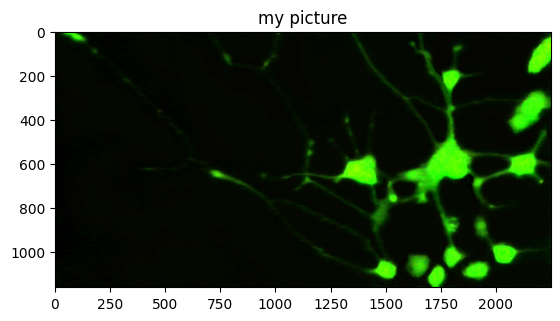

In [6]:
image=cv2.imread("002.jpg")
test_show(image)